## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [199]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [200]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

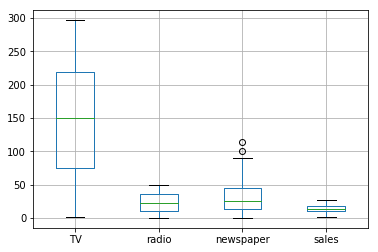

In [201]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

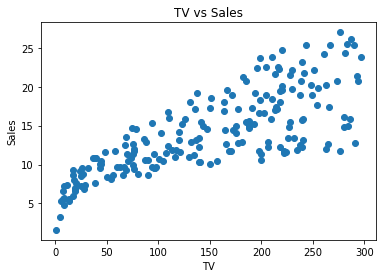

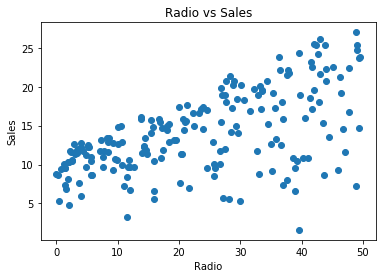

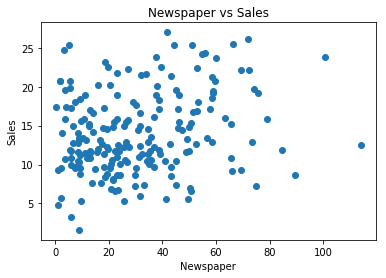

In [202]:
plt.ylabel('Sales')
plt.xlabel('TV')
plt.title('TV vs Sales')
plt.scatter(df['TV'],df['sales'])
plt.show()

plt.ylabel('Sales')
plt.xlabel('Radio')
plt.title('Radio vs Sales')
plt.scatter(df['radio'],df['sales'])
plt.show()

plt.ylabel('Sales')
plt.xlabel('Newspaper')
plt.title('Newspaper vs Sales')
plt.scatter(df['newspaper'],df['sales'])
plt.show()

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a22a0bf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f073278>]], dtype=object)

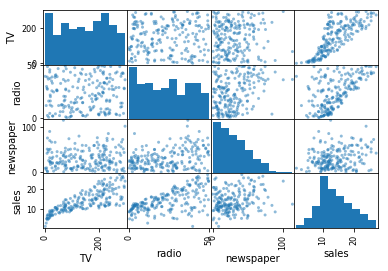

In [203]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df)

Which of the variables seem correlated with one another? Which don't? Explain your answer

It seems like TV and radio correlate with sales, while the rest of the variables do not correlate with each others.
When variables TV and radio become higher, the sales become larger as well. However, such relationship is not observed in the case of newspaper and sales.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [204]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [205]:
y= df['sales']

b) Set X to be just the features described above in df

In [206]:
X= df[['TV','radio','newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [207]:
import numpy as np
size=200
X=np.array(X)
y=np.array(y)
random_order = np.arange(len(y))
np.random.shuffle(random_order)
X = X[random_order]
y = y[random_order]
X_train = X[0:int(size*0.8)]
y_train = y[0:int(size*0.8)]
X_test = X[int(size*0.8):]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [208]:
regr = LinearRegression()
regr.fit(X_train, y_train)
#plt.title('R^2')
#plt.scatter(regr.predict(X_test),y_test)
#plt.plot(y_test,y_test)
#print('Variance score: %.2f' % regr.score(X_test, y_test))
train=X_train
prdct=regr.predict(X_train)

for num in range(0,int(size*0.8)):
    print ('TV:',train[num,0],'radio:',train[num,1],'newspaper:',train[num,2])
    print ('predicted sales:',prdct[num])
    print('\n')

TV: 7.3 radio: 28.1 newspaper: 41.4
predicted sales: 8.21013049677


TV: 38.0 radio: 40.3 newspaper: 11.9
predicted sales: 12.0461984629


TV: 117.2 radio: 14.7 newspaper: 5.4
predicted sales: 11.0146935352


TV: 239.8 radio: 4.1 newspaper: 36.9
predicted sales: 14.7744802456


TV: 180.8 radio: 10.8 newspaper: 58.4
predicted sales: 13.1701834206


TV: 44.7 radio: 25.8 newspaper: 20.6
predicted sales: 9.61246009096


TV: 261.3 radio: 42.7 newspaper: 54.7
predicted sales: 23.0191334204


TV: 73.4 radio: 17.0 newspaper: 12.9
predicted sales: 9.34242461908


TV: 213.4 radio: 24.6 newspaper: 13.1
predicted sales: 17.4393282653


TV: 66.9 radio: 11.7 newspaper: 36.8
predicted sales: 7.9724788726


TV: 199.1 radio: 30.6 newspaper: 38.7
predicted sales: 17.821032468


TV: 151.5 radio: 41.3 newspaper: 58.5
predicted sales: 17.5171364798


TV: 44.5 radio: 39.3 newspaper: 45.1
predicted sales: 12.0805299103


TV: 19.6 radio: 20.1 newspaper: 17.0
predicted sales: 7.35349647318


TV: 276.9 radio: 4

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [209]:
y2 = regr.predict(X_test)
SSRes = sum((y2-y_test)**2)
SSTot = sum((y_test-np.mean(y_test))**2)
r2 = 1 - SSRes/SSTot
print(r2)
#It is good because the R^2 value is close to 1, which means the variance is small.

0.897604388743


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

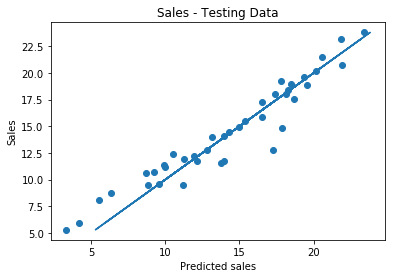

In [210]:
plt.ylabel('Sales')
plt.xlabel('Predicted sales')
plt.title('Sales - Testing Data')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)
# Yes, it looks like a good model.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_



Yes, the importance of features can be determined by examining the regression coefficient. However, before making conclusion, it is important to check if the data was standardized prior to regression.

In [211]:
print ('coeffiecient before standardization:',regr.coef_)

meanX=np.mean(X_train, axis=0)
stdX=np.std(X_train, axis=0)
nmlz_X_train=np.subtract(X_train,meanX)
nmlz_X_train=np.divide(nmlz_X_train,stdX)

meanY=np.mean(y_train, axis=0)
stdY=np.std(y_train, axis=0)
nmlz_y_train=np.subtract(y_train,meanY)
nmlz_y_train=np.divide(nmlz_y_train,stdY)
regr.fit(nmlz_X_train, nmlz_y_train)


print('coeffiecient after standardization:',regr.coef_)

coeffiecient before standardization: [ 0.04761806  0.18827619 -0.00261776]
coeffiecient after standardization: [ 0.76862221  0.53587638 -0.01081108]


h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From looking at the coefficient of different variables, we can conclude that variables TV and radio are relevant to sales. On the other hand, variable newspaper is irrelevant to sales. TV is a more relevant viraible to sales comparing with radio.

The most important thing should have done is to standardize the data. From g), we can see that the coefficient of radio is larger than TV before standization, while the coefficient of radio is smaller than TV after standardization. It might lead to wrong conclusion that the radio is more relevant to sales than radio.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

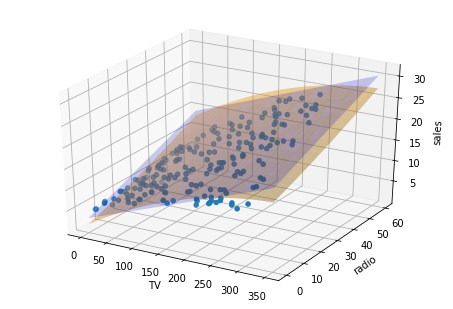

blue: original hyperplane solution
orange: new hyperplane solution


In [212]:

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)

# Orignal model with only two variable (TV,radio)
x=df[['TV','radio']]
Y=df['sales']
size=200
x=np.array(x)
Y=np.array(Y)
random_order = np.arange(len(Y))
np.random.shuffle(random_order)
x = x[random_order]
Y = Y[random_order]
x_train = x[0:int(size*0.8)]
Y_train = Y[0:int(size*0.8)]
x_test = x[int(size*0.8):]
Y_test = Y[int(size*0.8):]

regr.fit(x_train,Y_train)

regr.predict(x_test)
x = np.linspace(0, 350, 30)
y = np.linspace(0, 60, 10)
xv,yv = np.meshgrid(x,y)
zv = regr.predict(np.array([xv.ravel(),yv.ravel()]).T)
zv=zv.reshape(xv.shape)

ax.plot_surface(xv,yv,zv,alpha=0.2,color='blue')

# New model with new variable TV^2 and radio^2
df['new_variable1']=np.power(df['TV'],2)
df['new_variable2']=np.power(df['radio'],2)
x=df[['TV','radio','new_variable1','new_variable2']]
Y=df['sales']

size=200
x=np.array(x)
Y=np.array(Y)
random_order = np.arange(len(Y))
np.random.shuffle(random_order)
x = x[random_order]
Y = Y[random_order]
x_train = x[0:int(size*0.8)]
Y_train = Y[0:int(size*0.8)]
x_test = x[int(size*0.8):]
Y_test = Y[int(size*0.8):]

regr.fit(x_train,Y_train)

regr.predict(x_test)
x = np.linspace(0, 350, 30)
y = np.linspace(0, 60, 10)
xv,yv = np.meshgrid(x,y)
zv = regr.predict(np.array([xv.ravel(),yv.ravel(),np.power(xv.ravel(),2),np.power(yv.ravel(),2)]).T)
zv=zv.reshape(xv.shape)

#plotting the hyperplane solution in 3D
ax.set_xlabel('TV')
ax.set_ylabel('radio')
ax.set_zlabel('sales')
ax.scatter(df['TV'],df['radio'],df['sales'])
ax.plot_surface(xv,yv,zv,alpha=0.4,color='orange')
pyplot.show()

print('blue: original hyperplane solution')
print('orange: new hyperplane solution')

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


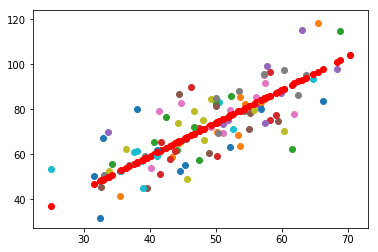

In [213]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


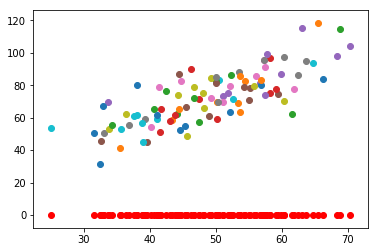

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


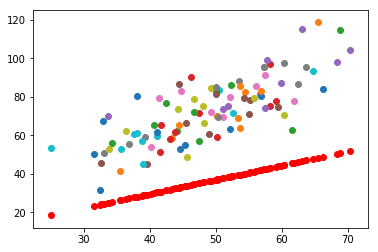

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


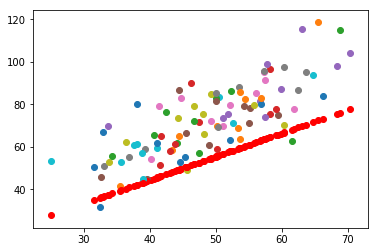

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


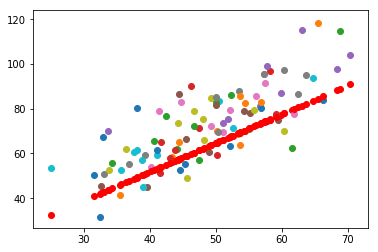

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


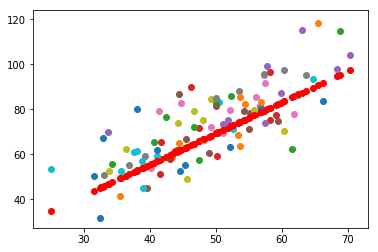

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


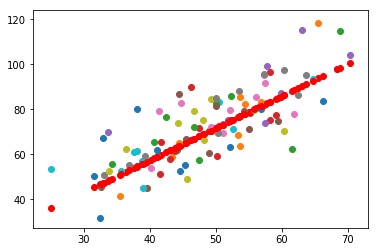

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


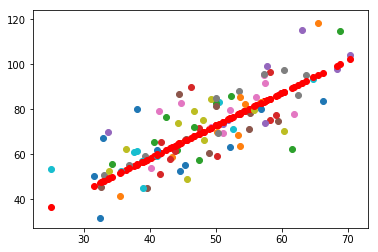

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


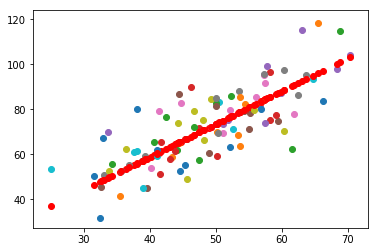

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


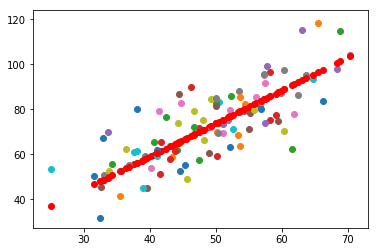

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


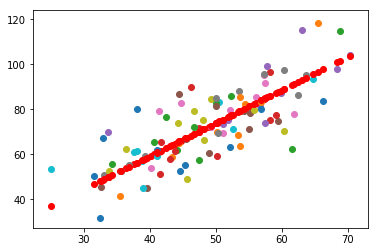

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


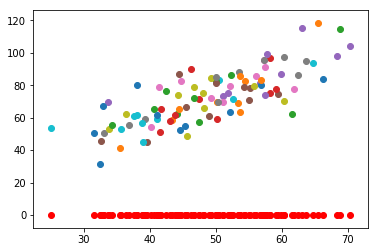

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.14547010110737296, m = 7.370702973591052, error = 86648.7950040084


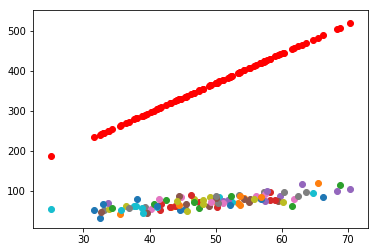

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.4310655239730718, m = -21.99310808948739, error = 1373530.9288716826


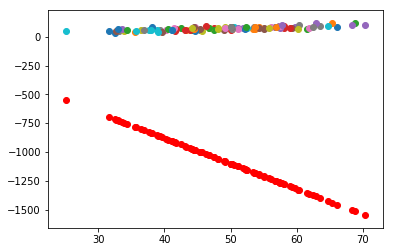

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 1.8687588994744613, m = 94.98776074664512, error = 21797683.773910433


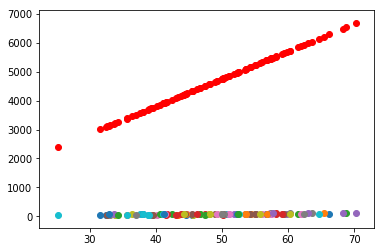

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -7.290394967823431, m = -371.0461698674138, error = 345950151.4758198


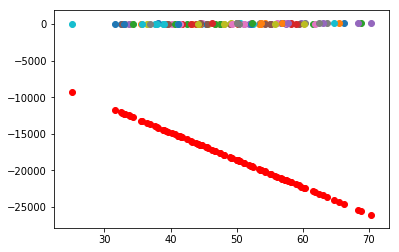

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 29.201266087964783, m = 1485.5616013916942, error = 5490585677.503522


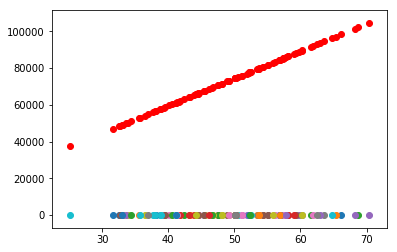

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -116.1729306293348, m = -5910.879572855865, error = 87141281978.78775


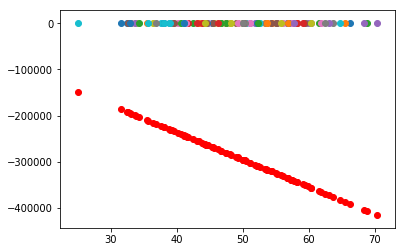

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 462.9786062650985, m = 23555.409616750556, error = 1383022432889.3494


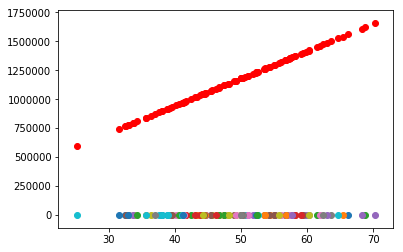

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1844.2694554138704, m = -93833.77530608332, error = 21949998997164.68


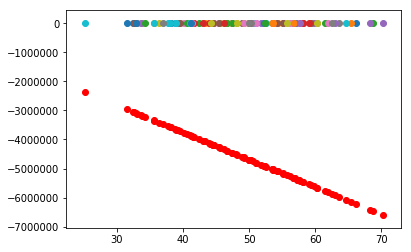

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 7347.456577722989, m = 373826.76516900567, error = 348369227101706.6


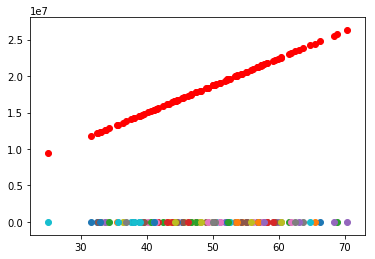

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


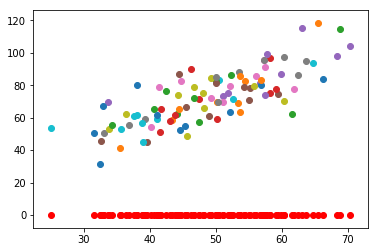

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.0014547010110737297, m = 0.07370702973591052, error = 5035.166806835488


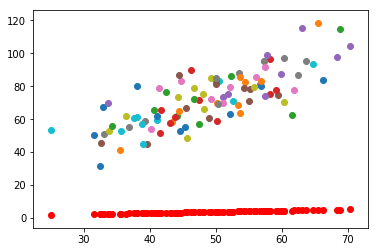

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.0028372014495286774, m = 0.14374060806815414, error = 4556.7323715944


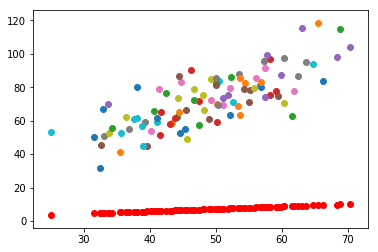

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.004151099681139559, m = 0.21028381419066666, error = 4124.798445175136


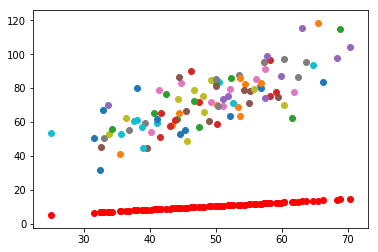

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.005399814734639951, m = 0.27351060291065116, error = 3734.8455006002387


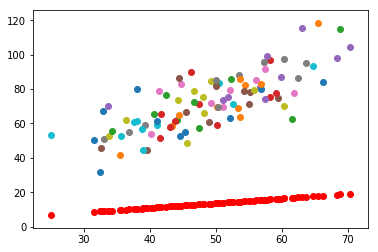

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.006586595239605855, m = 0.3335862593940432, error = 3382.7932775716404


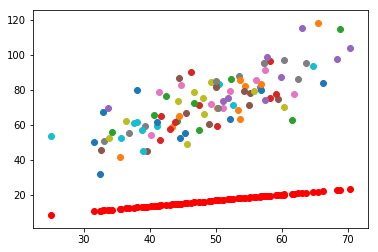

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0077145279188888345, m = 0.3906678312471585, error = 3064.958088795723


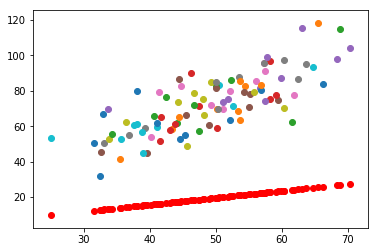

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.008786545657799282, m = 0.4449045390640527, error = 2778.014275837526


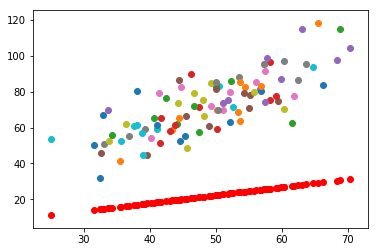

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.009805435171133943, m = 0.49643816651282946, error = 2518.959411198589


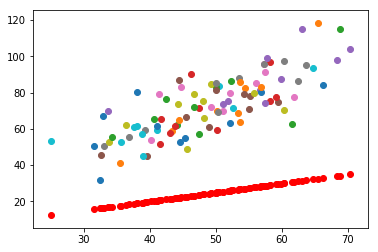

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.010773844288090539, m = 0.5454034309806438, error = 2285.082882511535


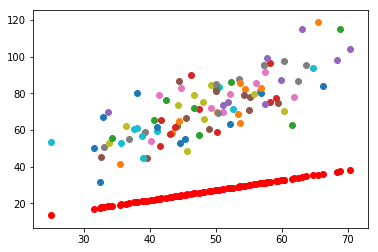

In [214]:
# Use this to visually discuss convergence rate based on learning rate
def run2(num_iterations,input_learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = input_learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

# learning rate=0.0001, which is a moderate number. It converges at a proper speed
for num in range(0,10):
    run(num,)
    plt.show()
    
# learning rate=0.1, which is too large. It does not converge.
for num in range(0,10):
    run2(num,0.001)
    plt.show()

# learning rate=0.00001, which is too small. The convergence takes longer time.
for num in range(0,10):
    run2(num,0.00001)
    plt.show()


We can see that if the learning rate is 0.0001, the convergence would happen in fewer iterations than learning rate is 0.00001. This is caused by the larger step size of gradient descent when learning rate is 0.0001. It takes fewer iterations to approach the convergence with a larger step size. However, if the learning rate is too large (learning rate = 0.001), the convergence will not happen and the convergence will overshoot the minimum and ocsillate back and forth because the step size is too larger.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

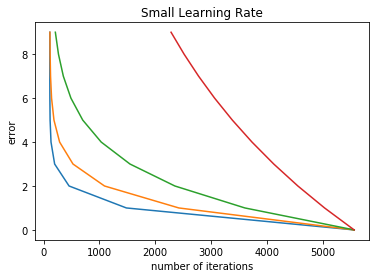

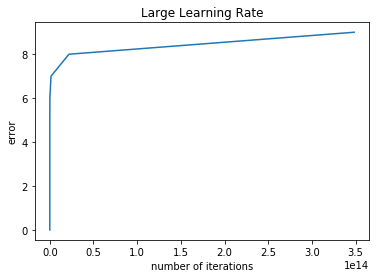

In [215]:
def plot_itrn_err(rate):
    itrn=np.zeros(10)
    err=np.zeros(10)
    for num in range(0,10):
        points = genfromtxt("../data/data.csv", delimiter=",")
        learning_rate = rate
        initial_b = 0 # initial y-intercept guess
        initial_m = 0 # initial slope guess
        num_iterations = num
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        itrn[num]=num
        err[num]=compute_error_for_line_given_points(b, m, points)
    plt.plot(err,itrn)

plt.title('Small Learning Rate')
plt.ylabel('error')
plt.xlabel('number of iterations')
plot_itrn_err(0.0001)
plot_itrn_err(0.00007)
plot_itrn_err(0.00004)
plot_itrn_err(0.00001)

plt.show()

plt.title('Large Learning Rate')
plt.ylabel('error')
plt.xlabel('number of iterations')
plot_itrn_err(0.001)

plt.show()

As the graph shown, if the learning rate is too large, error increases with number of interations increase, which means it will not converge. However, in the plot that convergence happened, it takes much longer take to converge when learning rate is smaller.